In [1]:
import pandas as pd
import numpy as np

In [2]:
path='titanic/'

train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+ "test.csv")

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# 생존자 비율
train['Survived'].value_counts(normalize=True) 
# normalize=True를 이용하면 비율로 출력됨

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

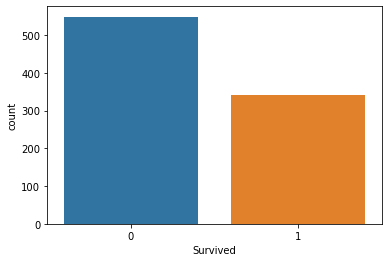

In [6]:
sns.countplot(train['Survived'])


In [7]:
train['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [8]:
train['Survived'].groupby(train['Pclass']).mean()
# Pclass 별 생존률 확인

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

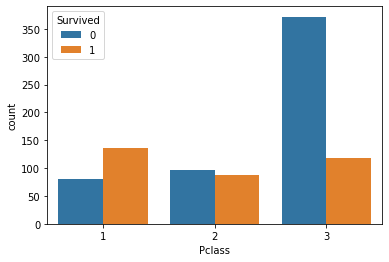

In [9]:
sns.countplot(train['Pclass'], hue=train['Survived'])

In [10]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [11]:
# 호칭별 인원수를 출력하고싶다.
train['Name_Title']=train['Name'].apply(lambda x:x.split(",")[1]).apply(lambda x:x.split()[0])


In [12]:
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Capt.          1
the            1
Mme.           1
Ms.            1
Sir.           1
Don.           1
Jonkheer.      1
Lady.          1
Name: Name_Title, dtype: int64

In [13]:
train['Survived'].groupby(train['Name_Title']).mean()

Name_Title
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64

In [14]:
train['Name_Len'] = train['Name'].apply(lambda x: len(x))
train['Name_Len']

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name_Len, Length: 891, dtype: int64

In [15]:
# 이름의 길이를 구간으로 나눈 다음, 구간별 생존률
train['Survived'].groupby(pd.qcut(train['Name_Len'],5)).mean()

Name_Len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64

In [16]:
train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [17]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [18]:
train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Name_Title   891 non-null    object 
 13  Name_Len     891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [20]:
train['Survived'].groupby(pd.qcut(train['Age'],5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

In [21]:
pd.qcut(train['Age'],5).value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: Age, dtype: int64

In [22]:
pd.qcut(train['Age'],5).value_counts(normalize=True)

(0.419, 19.0]    0.229692
(31.8, 41.0]     0.201681
(41.0, 80.0]     0.198880
(19.0, 25.0]     0.191877
(25.0, 31.8]     0.177871
Name: Age, dtype: float64

In [23]:
train['Survived'].groupby(train['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [24]:
train['SibSp'].value_counts()


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [25]:
train['Survived'].groupby(train['Parch']).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [26]:
train['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [27]:
train['Ticket'].head(n=10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [28]:
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))

In [29]:
train.groupby(['Ticket_Len'])['Survived'].mean()

Ticket_Len
3     0.000000
4     0.366337
5     0.618321
6     0.319809
7     0.296296
8     0.539474
9     0.192308
10    0.341463
11    0.250000
12    0.400000
13    0.400000
15    0.333333
16    0.272727
17    0.428571
18    0.000000
Name: Survived, dtype: float64

In [30]:
train['Ticket_Len'].value_counts()


6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
12     10
13     10
15      9
11      8
18      6
3       2
Name: Ticket_Len, dtype: int64

In [31]:
train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])

In [32]:
train['Ticket_Lett'].value_counts()


3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_Lett, dtype: int64

In [33]:
train.groupby(['Ticket_Lett'])['Survived'].mean()


Ticket_Lett
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

In [34]:
pd.qcut(train['Fare'], 3).value_counts()

(-0.001, 8.662]    308
(26.0, 512.329]    295
(8.662, 26.0]      288
Name: Fare, dtype: int64

In [35]:
train['Survived'].groupby(pd.qcut(train['Fare'], 3)).mean()

Fare
(-0.001, 8.662]    0.198052
(8.662, 26.0]      0.402778
(26.0, 512.329]    0.559322
Name: Survived, dtype: float64

In [36]:
pd.crosstab(pd.qcut(train['Fare'], 5), columns=train['Pclass'])

Pclass,1,2,3
Fare,,,
"(-0.001, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


In [37]:
train['Cabin_Letter'] = train['Cabin'].apply(lambda x: str(x)[0])

In [38]:
train['Cabin_Letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

In [39]:
train['Survived'].groupby(train['Cabin_Letter']).mean()

Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

In [40]:
train['Cabin_num']=train['Cabin'].apply(lambda x: str(x).split()[-1][1:])
train['Cabin_num'].replace("an", np.NaN, inplace=True)


In [41]:
train['Cabin_num']
train['Cabin_num']=train['Cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x !="" else np.NaN)

In [42]:
pd.qcut(train['Cabin_num'],3).value_counts()


(1.999, 28.667]     67
(65.667, 148.0]     67
(28.667, 65.667]    66
Name: Cabin_num, dtype: int64

In [43]:
train['Survived'].groupby(pd.qcut(train['Cabin_num'], 3)).mean()

Cabin_num
(1.999, 28.667]     0.716418
(28.667, 65.667]    0.651515
(65.667, 148.0]     0.641791
Name: Survived, dtype: float64

In [44]:
train['Survived'].corr(train['Cabin_num'])

-0.06384595922789371

In [45]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [46]:
train['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [47]:
train['Survived'].groupby(train['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

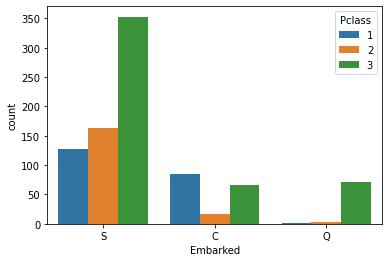

In [48]:
sns.countplot(train['Embarked'], hue=train['Pclass'])


#### feature engineering

In [49]:
def names(train, test):
  for i in [train,test]:
    i['Name_Len']=i['Name'].apply(lambda x:len(x))
    i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
    del i['Name']
  return train, test

In [51]:
path='titanic/'

train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+ "test.csv")

In [52]:
train, test= names(train, test)

In [53]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Len,Name_Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,Mr.
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,51,Mrs.
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,Miss.
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,44,Mrs.
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,24,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,21,Rev.
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,28,Miss.
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,40,Miss.
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,21,Mr.


In [54]:
def age_impute(train,test):
  for i in [train,test]:
    i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
  train['mean'] = train.groupby(['Name_Title', 'Pclass'])['Age'].transform('mean')
  train['Age'] = train['Age'].fillna(train['mean'])
  z = test.merge(train, on=['Name_Title', 'Pclass'], how='left').drop_duplicates(['PassengerId_x'])
  test['Age'] = np.where(test['Age'].isnull(), z['mean'], test['Age'])
  test['Age'] = test['Age'].fillna(test['Age'].mean())
  del train['mean']

  return train, test

In [55]:
train, test = age_impute(train,test)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Sex            891 non-null    object 
 4   Age            891 non-null    float64
 5   SibSp          891 non-null    int64  
 6   Parch          891 non-null    int64  
 7   Ticket         891 non-null    object 
 8   Fare           891 non-null    float64
 9   Cabin          204 non-null    object 
 10  Embarked       889 non-null    object 
 11  Name_Len       891 non-null    int64  
 12  Name_Title     891 non-null    object 
 13  Age_Null_Flag  891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [57]:
def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test


In [58]:
train, test = fam_size(train, test)

In [59]:
def ticket_grouped(train, test):
    for i in [train, test]:
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test

In [60]:
train, test = ticket_grouped(train, test)

In [61]:
def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3)
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test


In [62]:
train, test = cabin_num(train, test)

In [63]:
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test


In [64]:
train, test = cabin(train, test)

In [65]:
def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test


In [66]:
train, test = embarked_impute(train, test)

In [67]:
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test


In [68]:
train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 
                                              'Cabin_Letter', 'Name_Title', 'Fam_Size'])


In [69]:
def drop(train, test, bye = ['PassengerId']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test


In [70]:
train, test = drop(train, test)
train

,Survived,Age,Fare,Name_Len,Age_Null_Flag,Ticket_Len,"Cabin_num_(1.999, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148.0]",Pclass_3,...,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big
0,0,22.000000,7.2500,23,0,9,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,38.000000,71.2833,51,0,8,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,22,0,16,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,1,35.000000,53.1000,44,0,6,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,35.000000,8.0500,24,0,6,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,21,0,6,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
887,1,19.000000,30.0000,28,0,6,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
888,0,16.123188,23.4500,40,1,10,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
889,1,26.000000,30.0000,21,0,6,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [71]:
test.info()
test["Fare"].fillna(train["Fare"].mean(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         418 non-null    float64
 1   Fare                        417 non-null    float64
 2   Name_Len                    418 non-null    int64  
 3   Age_Null_Flag               418 non-null    int64  
 4   Ticket_Len                  418 non-null    int64  
 5   Cabin_num_(1.999, 28.667]   418 non-null    uint8  
 6   Cabin_num_(28.667, 65.667]  418 non-null    uint8  
 7   Cabin_num_(65.667, 148.0]   418 non-null    uint8  
 8   Pclass_3                    418 non-null    uint8  
 9   Pclass_1                    418 non-null    uint8  
 10  Pclass_2                    418 non-null    uint8  
 11  Sex_male                    418 non-null    uint8  
 12  Sex_female                  418 non-null    uint8  
 13  Embarked_S                  418 non

#### 하이퍼 퍼러미터 튜닝

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
rf=RandomForestClassifier(max_features="auto",
                       random_state=1,
                       oob_score=True,#out-of-bag: 트레이닝 과정에 사용되지 않은 데이터들로 평가를 하겠다.
                       n_jobs=-1)# 컴퓨터의 모든 cpu를 동원하겠다

In [74]:
## 안에 속성을 요소를 모두 짝지어서 다 모델을 만들어줌 아래에 경우 15번 모델을 만듬
param_grid={
    "n_estimators":[50,100,400,700,1000],
    "max_depth":[5,7,9]
}

In [75]:
gs=GridSearchCV(estimator=rf,
             param_grid=param_grid,
             n_jobs=-1,
             cv=3)#cv:교차 검증시 분할되는 폴드의 수

In [76]:
gs.fit(train.iloc[:,1:],train.iloc[:,0])

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9],
                         'n_estimators': [50, 100, 400, 700, 1000]})

In [77]:
print(gs.best_params_) 
print(gs.best_score_)

{'max_depth': 9, 'n_estimators': 100}
0.8338945005611672


In [78]:
## 모델을 만든 결과 최고는ㄴ
# 'max_depth': 9, 'n_estimators': 100}
# print(gs.best_score_) 위 값에 모델에 점수

In [79]:
#위에서 알아낸 최고의 결과가 나오는 옵션을 넣어서 모델 작성
rf=RandomForestClassifier(max_features="auto",
                       random_state=1,
                       oob_score=True,#out-of-bag: 트레이닝 과정에 사용되지 않은 데이터들로 평가를 하겠다.
                       n_jobs=-1,
                       max_depth=9,
                       n_estimators=100)

In [80]:
rf.fit(train.iloc[:,1:],train.iloc[:,0])

RandomForestClassifier(max_depth=9, n_jobs=-1, oob_score=True, random_state=1)

In [81]:
predictions=rf.predict(test)

In [82]:
predictions=pd.DataFrame(predictions,columns=["Survived"])

In [83]:
test=pd.read_csv(path+"test.csv")

In [84]:
test
predictions=pd.concat((test.iloc[:,0],predictions),axis=1)

In [85]:
predictions.to_csv("myprediction.csv",index=False)

#### 더미화 예시

In [86]:
music_df = pd.DataFrame({'music_id': [1, 2, 3, 4, 5], 
                      'music_genre': ['rock', 
                                      'disco', 
                                      'pop', 
                                      'rock', 
                                      'pop']}
                      , columns = ['music_id', 'music_genre'])
music_df

,music_id,music_genre
0,1,rock
1,2,disco
2,3,pop
3,4,rock
4,5,pop


In [87]:
music_dummy_mat = pd.get_dummies(music_df['music_genre'])
music_dummy_mat

,disco,pop,rock
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [88]:
music_dummy_mat = music_df.join(music_dummy_mat.add_prefix('genre_'))
music_dummy_mat

,music_id,music_genre,genre_disco,genre_pop,genre_rock
0,1,rock,0,0,1
1,2,disco,1,0,0
2,3,pop,0,1,0
3,4,rock,0,0,1
4,5,pop,0,1,0


In [89]:
# 그룹별 연산
# transform 함수 : 스칼라값, or 같은 크기를 갖는 배열이 리턴
# apply 함수 : 스칼라값이 리턴

In [90]:
tips=sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [91]:
tips.groupby("day").apply(np.mean)

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


In [92]:
tips.groupby("day").transform(np.mean)

,total_bill,tip,size
0,21.410000,3.255132,2.842105
1,21.410000,3.255132,2.842105
2,21.410000,3.255132,2.842105
3,21.410000,3.255132,2.842105
4,21.410000,3.255132,2.842105
...,...,...,...
239,20.441379,2.993103,2.517241
240,20.441379,2.993103,2.517241
241,20.441379,2.993103,2.517241
242,20.441379,2.993103,2.517241
